In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt
import os

2. Создай `DataLoader` в для обучающей и валидационных выборок. Примените аугментации к изображениям.

In [4]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [9]:
!ls ./drive/MyDrive/Colab\ Notebooks/Agricultural-crops

 almond     coconut	        jowar	      papaya		     sunflower
 banana     Coffee-plant        jute	     'Pearl_millet(bajra)'   tea
 cardamom   cotton	        Lemon	      pineapple		     Tobacco-plant
 Cherry     Cucumber	        maize	      rice		     tomato
 chilli    'Fox_nut(Makhana)'   mustard-oil   soyabean		    'vigna-radiati(Mung)'
 clove	    gram	        Olive-tree    sugarcane		     wheat


In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Путь к исходной папке
source_dir = './drive/MyDrive/Colab Notebooks/Agricultural-crops/'

# Пути к новым папкам
train_dir = 'train'
valid_dir = 'valid'

# Создаем папки train и valid, если они не существуют
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# Получаем список всех классов
classes = os.listdir(source_dir)

# Проходим по каждому классу
for class_name in classes:
    class_path = os.path.join(source_dir, class_name)

    # Получаем список всех файлов в текущем классе
    files = os.listdir(class_path)

    # Разделяем файлы на тренировочные и валидационные
    train_files, valid_files = train_test_split(files, test_size=0.2, random_state=42)

    # Создаем папки для текущего класса в train и valid
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)

    # Копируем файлы в соответствующие папки
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_dir, class_name))

    for file in valid_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(valid_dir, class_name))

print("Файлы успешно скопированы в новые папки train и valid.")

Файлы успешно скопированы в новые папки train и valid.


In [5]:
BATCH_SIZE = 128

In [15]:
# !unzip ./drive/MyDrive/Colab\ Notebooks/agricultural-images.zip
# !ls ./drive/MyDrive/Colab\ Notebooks/

In [6]:
trnsfrms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [7]:
train_dataset = datasets.ImageFolder(root='./drive/MyDrive/Colab Notebooks/train/', transform=trnsfrms)
test_dataset = datasets.ImageFolder(root='./drive/MyDrive/Colab Notebooks/test/', transform=trnsfrms)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

3. Создай экземпляр предобученной модели: [torchvision models](https://pytorch.org/vision/stable/models.html). Можно взять любую модель для baseline, а дальше попробовать что-то более сложное.

In [20]:
weights = torchvision.models.ResNet152_Weights.IMAGENET1K_V2.DEFAULT

In [21]:
model = torchvision.models.resnet152(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:01<00:00, 164MB/s]


In [22]:
weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [23]:
model.to(DEVICE)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

5. Замени выходной слой форматом, который подходит под задачу: бинарная или многоклассовая классификация.

In [27]:
train_dataset.classes

['Cherry',
 'Coffee-plant',
 'Cucumber',
 'Fox_nut(Makhana)',
 'Lemon',
 'Olive-tree',
 'Pearl_millet(bajra)',
 'Tobacco-plant',
 'almond',
 'banana',
 'cardamom',
 'chilli',
 'clove',
 'coconut',
 'cotton',
 'gram',
 'jowar',
 'jute',
 'maize',
 'mustard-oil',
 'papaya',
 'pineapple',
 'rice',
 'soyabean',
 'sugarcane',
 'sunflower',
 'tea',
 'tomato',
 'vigna-radiati(Mung)',
 'wheat']

In [25]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [28]:
model.fc = nn.Linear(in_features=2048, out_features=30, bias=True)
model.fc

Linear(in_features=2048, out_features=30, bias=True)

In [29]:
for param in model.parameters():
    param.requires_grad = False

model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [31]:
model.to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
tu.get_model_summary(model, torch.randn(BATCH_SIZE, 3, 224, 224, device=DEVICE))

Layer                                         Kernel               Output           Params              FLOPs
0_conv1                                      [3, 64, 7, 7]   [128, 64, 112, 112]       9,408   15,105,785,856
1_bn1                                                 [64]   [128, 64, 112, 112]         128      411,041,792
2_relu                                                   -   [128, 64, 112, 112]           0                0
3_maxpool                                                -     [128, 64, 56, 56]           0                0
4_layer1.0.Conv2d_conv1                     [64, 64, 1, 1]     [128, 64, 56, 56]       4,096    1,644,167,168
5_layer1.0.BatchNorm2d_bn1                            [64]     [128, 64, 56, 56]         128      102,760,448
6_layer1.0.ReLU_relu                                     -     [128, 64, 56, 56]           0                0
7_layer1.0.Conv2d_conv2                     [64, 64, 3, 3]     [128, 64, 56, 56]      36,864   14,797,504,512
8_layer1.0

6. Обучи модель (только последний слой!) и зафиксируй метрику на валидационной части выборки.

In [33]:
def fit(
        model: torch.nn.Module,
        n_epochs: int,
        optimizer: torch.optim.Optimizer,
        train_loader: DataLoader,
        valid_loader: DataLoader
        ) -> tuple[list, ...]:
    """Function to fit model

    Returns:
        train_losses: list of train losses per epoch
        valid_losses: list of valid losses per epoch
        train_acc: list of train accuracy per epoch
        valid_acc: list of valid accuracy per epoch
    """

    train_loss = []
    valid_loss = []
    train_metric = []
    valid_metric = []

    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        model.train()
        batch_loss = []
        batch_metric = []
        for images, labels in train_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            y_pred = model(images)

            loss = criterion(y_pred, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_loss.append(loss.item())
            batch_metric.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        train_loss.append(np.mean(batch_loss))
        train_metric.append(np.mean(batch_metric))
        model.eval()
        for images, labels in valid_loader:

            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            with torch.no_grad():
                y_pred = model(images)
            loss = criterion(y_pred, labels)
            batch_loss.append(loss.item())
            batch_metric.append((y_pred.cpu().argmax(axis=1) == labels.cpu()).numpy().mean())
        valid_metric.append(np.mean(batch_metric))
        valid_loss.append(np.mean(batch_loss))

        print(
            f'train: accuracy {train_metric[-1]:.4f}, loss {valid_loss[-1]:.4f}\n'
            f'valid: accuracy {valid_metric[-1]:.4f}, loss {valid_loss[-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()



    return train_loss, valid_loss, train_metric, valid_metric

In [34]:
def train_plot(train_loss, valid_loss, train_metric, valid_metric):
    fig, ax = plt.subplots(1,2, figsize=(14,5))
    ax[0].plot(train_loss, label='train loss')
    ax[0].plot(valid_loss, label='valid loss')
    ax[0].set_title(f'Loss on epoch {len(train_loss)}')
    ax[0].grid(True)
    ax[0].set_ylim((0, max(train_loss + valid_loss)+.1))
    ax[0].legend()

    ax[1].plot(train_metric, label='train acc')
    ax[1].plot(valid_metric, label='valid acc')
    ax[1].set_title(f'Accuracy on epoch {len(train_loss)}')
    ax[1].grid(True)
    ax[1].set_ylim((0, 1))
    ax[1].legend()

    plt.show()

In [35]:
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [36]:
train_loss, valid_loss, train_metric, valid_metric = fit(model, 25, optimizer, train_loader, test_loader)

Epoch 0
train: accuracy 0.0790, loss 3.2463
valid: accuracy 0.1282, loss 3.2463
-----------------------------------

Epoch 1
train: accuracy 0.4983, loss 2.8121
valid: accuracy 0.4979, loss 2.8121
-----------------------------------

Epoch 2
train: accuracy 0.6736, loss 2.4781
valid: accuracy 0.6467, loss 2.4781
-----------------------------------

Epoch 3
train: accuracy 0.7869, loss 2.1805
valid: accuracy 0.7362, loss 2.1805
-----------------------------------

Epoch 4
train: accuracy 0.8798, loss 1.8666
valid: accuracy 0.8110, loss 1.8666
-----------------------------------

Epoch 5
train: accuracy 0.8919, loss 1.6844
valid: accuracy 0.8304, loss 1.6844
-----------------------------------

Epoch 6
train: accuracy 0.9531, loss 1.4786
valid: accuracy 0.8883, loss 1.4786
-----------------------------------

Epoch 7
train: accuracy 0.9609, loss 1.3316
valid: accuracy 0.8977, loss 1.3316
-----------------------------------

Epoch 8
train: accuracy 0.9523, loss 1.2267
valid: accuracy 0.87

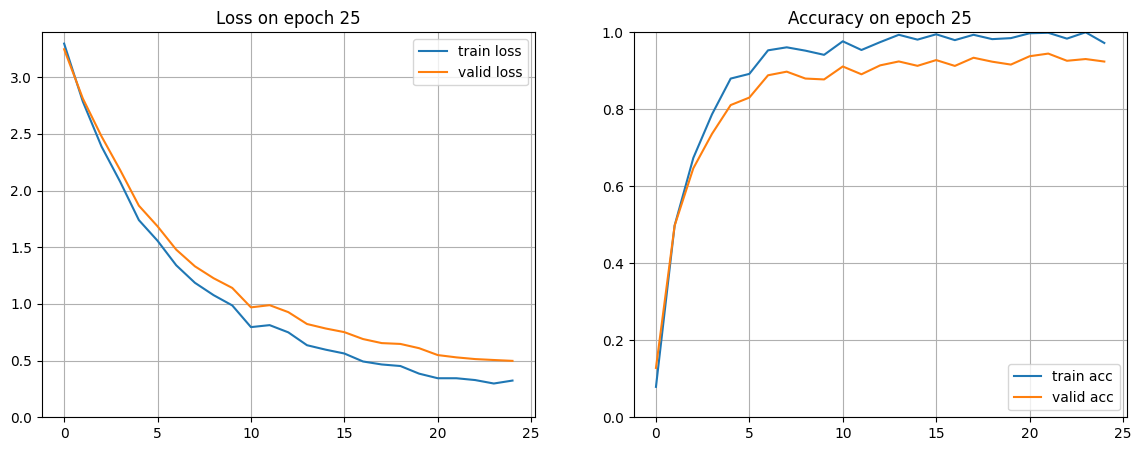

In [37]:
train_plot(train_loss, valid_loss, train_metric, valid_metric)

7. Распечатай изображение из тестовой выборки и подпиши класс картинки, предсказанный моделью.

In [9]:
idx = {i:k for i,k in enumerate(test_dataset.classes)}
idx

{0: 'Cherry',
 1: 'Coffee-plant',
 2: 'Cucumber',
 3: 'Fox_nut(Makhana)',
 4: 'Lemon',
 5: 'Olive-tree',
 6: 'Pearl_millet(bajra)',
 7: 'Tobacco-plant',
 8: 'almond',
 9: 'banana',
 10: 'cardamom',
 11: 'chilli',
 12: 'clove',
 13: 'coconut',
 14: 'cotton',
 15: 'gram',
 16: 'jowar',
 17: 'jute',
 18: 'maize',
 19: 'mustard-oil',
 20: 'papaya',
 21: 'pineapple',
 22: 'rice',
 23: 'soyabean',
 24: 'sugarcane',
 25: 'sunflower',
 26: 'tea',
 27: 'tomato',
 28: 'vigna-radiati(Mung)',
 29: 'wheat'}

In [10]:
imgs, lbls = next(iter(test_loader))
imgs = imgs.to(DEVICE)
lbls = lbls.to(DEVICE)

In [13]:
imgs.shape

torch.Size([128, 3, 224, 224])

In [43]:
sm = nn.Softmax(dim=0)
res = model(imgs[100].unsqueeze(0))
idx[int(res.argmax())], idx[int(lbls[100])]


('Pearl_millet(bajra)', 'Pearl_millet(bajra)')

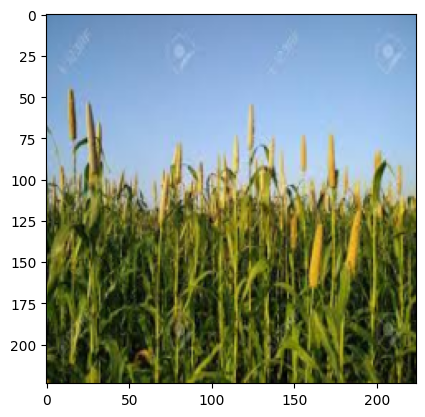

In [41]:
plt.imshow(torch.permute(imgs[100], (1, 2, 0)).to('cpu'))

In [44]:
torch.save(model.state_dict(),'./drive/MyDrive/Colab Notebooks/resnet152_agriculture.pth')